In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time



(train_images,train_labels), (test_images,test_labels) = tf.keras.datasets.mnist.load_data()




11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')
train_images, test_images = train_images / 255.0, test_images / 255.0
TRAIN_BUF = 60000
BATCH_SIZE = 100

TEST_BUF = 10000

train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels)).shuffle(TRAIN_BUF).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images,test_labels)).shuffle(TEST_BUF).batch(BATCH_SIZE)

In [0]:

train1,label1=iter(train_dataset).next()
print(label1.shape)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(
                filters=32, kernel_size=(3,3), activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add((tf.keras.layers.Dense(100,activation='relu')))
model.add(tf.keras.layers.Dense(10))
model.summary()
optimizer = tf.keras.optimizers.Adam(1e-4)


def compute_loss(model, x,y):
  pred=model(x)
  
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  loss=loss(y,pred)
  return loss
def compute_apply_gradients(model, x,y, optimizer):
  with tf.GradientTape() as tape:
    loss=compute_loss(model,x,y)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return loss


train_loss_results = []
train_accuracy_results = []

epoch = 15

for i in range(epoch) :
  start_time = time.time()
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
  for train_x,train_y in train_dataset :
    loss_value = compute_apply_gradients(model,train_x,train_y,optimizer)
  end_time = time.time()
  epoch_loss_avg.update_state(loss_value)
  epoch_accuracy.update_state(train_y, model(train_x, training=True))
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%} Time:{}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result(),end_time-start_time))
 

(100,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 015: Loss: 0.214, Accuracy: 93.000% Time:33.396156787872314
Epoch 015: Loss: 0.264, Accuracy: 93.000%

In [0]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 98.190%


tf.Tensor(16.717367, shape=(), dtype=float32)


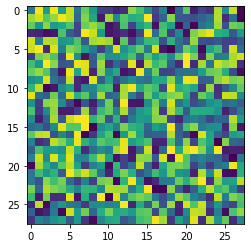

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 784)               784       
_________________________________________________________________
reshape_27 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 10)                542230    
Total params: 543,014
Trainable params: 784
Non-trainable params: 542,230
_________________________________________________________________
Epoch 000: Loss: 43.180
Epoch 100: Loss: 5.787
Epoch 200: Loss: 4.428
Epoch 300: Loss: 3.246
Epoch 400: Loss: 2.511
Epoch 500: Loss: 2.029
Epoch 600: Loss: 1.695
Epoch 700: Loss: 1.478
Epoch 800: Loss: 1.337
Epoch 900: Loss: 1.246
Epoch 1000: Loss: 1.189
Epoch 1100: Loss: 1.145
Epoch 1200: Loss: 1.117
Epoch 1300: Loss: 1.100
Epoch 1400: Loss: 1.095
Epoch 1500: Loss: 1.094


In [0]:
###Now I want to optimize input! 
image =tf.random.uniform (shape=(1,28,28,1), minval=0, maxval=1)
image=tf.Variable(image,trainable=True)
print(tf.norm(image))
plt.imshow(image[0,:,:,0])
plt.show()

new = image/tf.norm(image)
value =np.random.uniform ( low=0, high=1,size=784)

value = tf.constant_initializer(value)
newmodel = tf.keras.Sequential(tf.keras.layers.Dense(784,use_bias=False,kernel_initializer=value,input_shape=(1,))
)
newmodel.add(tf.keras.layers.Reshape((28,28,1)))

newmodel.add(model)


newmodel.layers[2].trainable = False
newmodel.summary()
one=tf.ones((1,1))
newmodel(one)

def compute_loss(model, x,y):
  pred=model(x)
  
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  loss=loss(y,pred)
  return loss
def compute_apply_gradients(model, x,y, optimizer):
  with tf.GradientTape() as tape:
    loss=compute_loss(model,x,y)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return loss
label = 0*tf.ones((1,1))

seq = newmodel.layers[2].get_weights()





compute_loss(newmodel,one,label)
optimizer = tf.keras.optimizers.Adam(1e-4)
for i in range(3000) :
  loss =compute_apply_gradients(newmodel,one,label,optimizer)
  weight1= newmodel.layers[0].get_weights()
  weight1=weight1/tf.norm(weight1)
  newmodel.layers[0].set_weights(weight1)
  if i%100 == 0 : 
    print("Epoch {:03d}: Loss: {:.3f}" .format(i,loss) )
first_layer_weights = newmodel.layers[0].get_weights()[0]


(1, 784)
tf.Tensor(1.0, shape=(), dtype=float32)


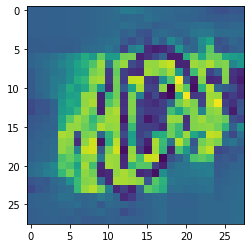

In [0]:
print(first_layer_weights.shape)
img = first_layer_weights.reshape(28,28)
print(tf.norm(img))
plt.imshow(img)